Start with the necessary imports and reading the datasets of github. The datasets can be combined used concat() function:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

dataset91 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short91_f1_000.csv.gz',index_col=False)
dataset92 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short92_e2_000.csv.gz',index_col=False)
dataset93 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short93_d2_000.csv.gz',index_col=False)
dataset94 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/dimuon_short94_c2_000.csv.gz',index_col=False)
dataset = pd.concat([dataset91, dataset92, dataset93, dataset94])
dataset.head()

,NRUN,IEVT,ECM,E1,P1,PT1,PX1,PY1,PZ1,Q1,...,P2,PT2,PX2,PY2,PZ2,Q2,PHI2,THETA2,MISSPT,MISSPHI
0,20631,746,91.250,41.847,41.847,41.725,-40.788,8.793,3.192,-1.0,...,33.876,46.693,33.017,-7.097,-2.666,1.0,-0.212,1.650,7.954,-0.215
1,20694,1956,91.286,110.783,110.783,42.253,35.688,-22.621,-102.408,1.0,...,62.660,24.881,17.593,-10.661,-59.187,-1.0,-0.545,2.807,62.821,2.583
2,20704,767,91.280,28.322,28.322,28.305,7.921,-27.174,0.977,-1.0,...,22.503,9.863,-6.974,21.395,-0.104,1.0,1.886,1.575,5.857,1.733
3,20723,1571,91.282,42.509,42.508,42.505,32.779,27.059,0.552,-1.0,...,40.701,44.330,-31.346,-25.960,-0.312,1.0,-2.450,1.578,1.806,-2.487
4,21112,148,91.282,39.894,39.894,39.845,-7.051,-39.216,-1.98,1.0,...,36.151,8.602,6.083,35.568,-2.199,-1.0,1.401,1.632,3.774,1.311


The goal of this exercise is to find a particle using invariant mass. This can be done by checking which invariant masses are produced by the particle accelerator. If there area a lot of datapoints for a specific invariant mass that means there's a particle. Since the dataset does not have invariant mass, we have to calculate it ourselves. If we try to do that, we first notice an error caused by mistakes in the data. After some tests we see that there are some values of PZ1 with the value **********. First we remove those from the dataset and then change the datatype of the values to float64 since the values were saved as strings. 

Now using the fixed dataset we can calculate the invariant mass using the formula: 

$$
Mc^2 = \sqrt{(E_1 + E_2)^2 - c^2 (\vec{p}_1 + \vec{p}_2)^2 }
$$

To simplify the calculations we can use natural units where $c=1$. If you just do this the program will give you a warning about negative values in the dataset. Due to measurement error some values will infact be negative. Sinve they are caused by measurement error they are all quite small and will just be removed for now. 

In [2]:
dataset = dataset[dataset.PZ1 != '**********']
dataset = dataset.astype({'PZ1': 'float64'})

#removing negative values:
dataset = dataset.drop(dataset[(dataset.E1 + dataset.E2)**2 - (dataset.PX1 + dataset.PX2)**2 - (dataset.PZ1 + dataset.PZ2)**2 - (dataset.PY1 + dataset.PY2)**2 < 0].index)

#calculating invariant mass:
dataset["M"] = np.sqrt((dataset.E1 + dataset.E2)**2 - (dataset.PX1 + dataset.PX2)**2 - (dataset.PZ1 + dataset.PZ2)**2 - (dataset.PY1 + dataset.PY2)**2)
dataset.head()

,NRUN,IEVT,ECM,E1,P1,PT1,PX1,PY1,PZ1,Q1,...,PT2,PX2,PY2,PZ2,Q2,PHI2,THETA2,MISSPT,MISSPHI,M
0,20631,746,91.250,41.847,41.847,41.725,-40.788,8.793,3.192,-1.0,...,46.693,33.017,-7.097,-2.666,1.0,-0.212,1.650,7.954,-0.215,75.302266
1,20694,1956,91.286,110.783,110.783,42.253,35.688,-22.621,-102.408,1.0,...,24.881,17.593,-10.661,-59.187,-1.0,-0.545,2.807,62.821,2.583,4.829143
2,20704,767,91.280,28.322,28.322,28.305,7.921,-27.174,0.977,-1.0,...,9.863,-6.974,21.395,-0.104,1.0,1.886,1.575,5.857,1.733,50.478954
3,20723,1571,91.282,42.509,42.508,42.505,32.779,27.059,0.552,-1.0,...,44.330,-31.346,-25.960,-0.312,1.0,-2.450,1.578,1.806,-2.487,83.191055
4,21112,148,91.282,39.894,39.894,39.845,-7.051,-39.216,-1.980,1.0,...,8.602,6.083,35.568,-2.199,-1.0,1.401,1.632,3.774,1.311,75.837228


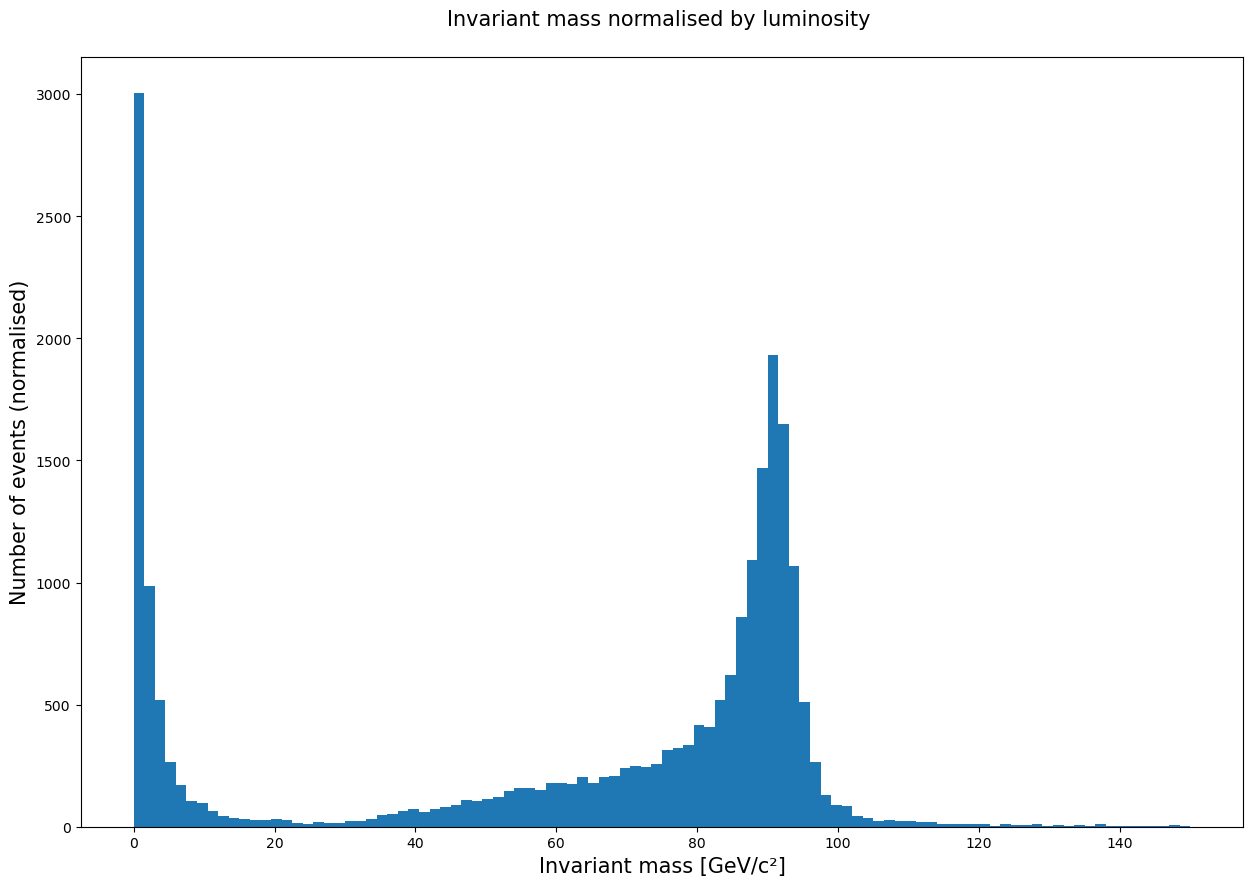

In [3]:
fig = plt.figure(figsize=(15, 10))
plt.hist(dataset.M, bins=100, range=(0,150))

plt.xlabel('Invariant mass [GeV/c²]', fontsize=15)
plt.ylabel('Number of events (normalised)', fontsize=15)
plt.title('Invariant mass normalised by luminosity \n', fontsize=15) 

plt.show()

Now that we have the histogram we can start analysing it. There is a peak (often called a resonance) at around 103 GeV. This peak signifies a particle. We can actually get more from this histogram. This is done by plotting what is called a Breit-Wigner function on the histogram. Breit-Wigner distribution is of the following form:

$$
f(E) = \dfrac{k}{(E^2 - M^2)^2 + M^2 \Gamma^2} 
$$

where $k = \dfrac{2\sqrt{2}M \Gamma \gamma}{\pi\sqrt{M^2 + \gamma}}$ with $\gamma = \sqrt{M^2(M^2 + \Gamma^2)}$ which are in natural units $\hbar = c = 1$. 

(Resonance here seems wide, wasn't there a variation that should be used when its too wide? Whatever too wide even is)

Let's start with the simple parts of the fitting. First we only cover the area around where we know the particle is by setting limits to the mass values we use and remove the rest from the dataset. Then we set the initial guesses. In this fit there are 5 variables. We can guess that the max values is the peak we saw in the histogram. The rest we can guess and if the plot isn't good try again. (Are they always positive? It seems so by testing)

In [4]:
#limit to where Z-boson should be:
lowerlimit = 70
upperlimit = 100


#Change the dataset for that area
limitedmasses = dataset[(dataset.M > lowerlimit) & (dataset.M < upperlimit)]
histogram = plt.hist(limitedmasses.M, bins=50, range=(lowerlimit,upperlimit), density = True)
plt.close() #stop from showing the plot

#Initial guesses:
initials = [5, 90, 4, 2, 4]

Next step is to create the fit. First we define a function that matches the form of the Breit-Wigner function given earlier. Then we fit this function into the histogram by using curve_fit() from scipy.optimize. Let's also save the best values and covariance that the fitting gives us. 

In [5]:
from scipy.optimize import curve_fit


def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

#use the histogram to make a function:
y = histogram[0]
x = 0.5*(histogram[1][0:-1] + histogram[1][1:])
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))

Lastly we plot both this fitted function and the histogram into the same picture. We can also print the best values and their limits of error, which can be easily calculated from the covariance. 

The values and the uncertainties from the optimization:

The value of the decay width = 7.323538468469971 +- 0.41134665236863205
The value of the maximum of the distribution = 90.62100104021339 +- 0.1010846599817699
a = -0.0007495938628601569 +- 6.595053916894365e-05
b = 0.06438834759402297 +- 0.004911747202933199
A = 1.1498955158525361 +- 0.06062815859581237


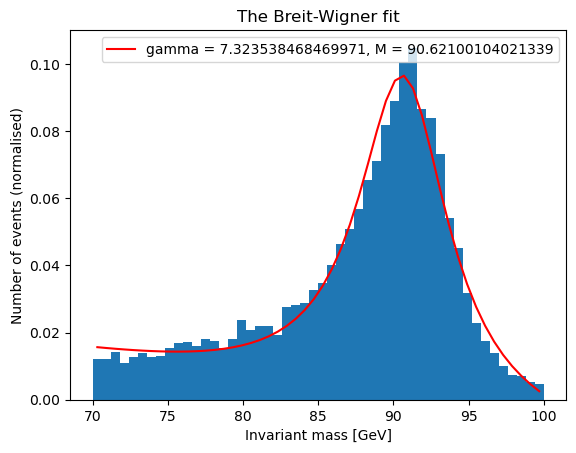

In [6]:
error = np.sqrt(np.diag(covariance))
    
#Parameters and their errors from optimization:
print("The values and the uncertainties from the optimization:")
print("")
print("The value of the decay width = {} +- {}".format(best[0], error[0]))
print("The value of the maximum of the distribution = {} +- {}".format(best[1], error[1]))
print("a = {} +- {}".format(best[2], error[2]))
print("b = {} +- {}".format(best[3], error[3]))
print("A = {} +- {}".format(best[4], error[4]))

#plot both graphs:
plt.hist(limitedmasses.M, bins=50, range=(lowerlimit,upperlimit), density = True)
plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events (normalised)')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

Remove high missing potential:

12792
8890
The values and the uncertainties from the optimization:

The value of the decay width = 6.272456092826122 +- 0.2207457790598211
The value of the maximum of the distribution = 90.80773054026123 +- 0.06236672052307315
a = -0.00048156370065822324 +- 3.88931601742655e-05
b = 0.03405816219673979 +- 0.0028081321130171226
A = 1.389837432763581 +- 0.04021891767260632


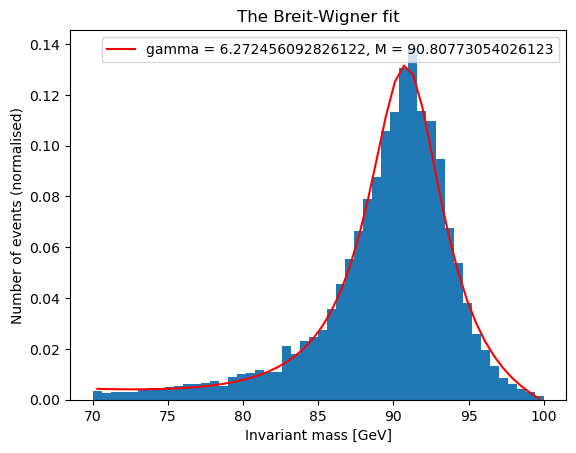

In [7]:
#limit to where Z-boson should be:
lowerlimit = 70
upperlimit = 100

missing_pot_limit = 5
print(len(limitedmasses))
limited_missing_pot = limitedmasses[limitedmasses.MISSPT < missing_pot_limit]
print(len(limited_missing_pot))
histogram = plt.hist(limited_missing_pot.M, bins=50, range=(lowerlimit,upperlimit), density = True)


def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

#Initial guesses:
initials = [5, 90, 4, 2, 4]

#use the histogram to make a function:
y = histogram[0]
x = 0.5*(histogram[1][0:-1] + histogram[1][1:])
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y))
error = np.sqrt(np.diag(covariance))
    
#Values from optimization:
print("The values and the uncertainties from the optimization:")
print("")
print("The value of the decay width = {} +- {}".format(best[0], error[0]))
print("The value of the maximum of the distribution = {} +- {}".format(best[1], error[1]))
print("a = {} +- {}".format(best[2], error[2]))
print("b = {} +- {}".format(best[3], error[3]))
print("A = {} +- {}".format(best[4], error[4]))


#plot graph:
plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events (normalised)')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

It does seem to actually be more accurate, although it didn't make a big difference.